In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Basic Things

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [42]:
df = pd.read_csv('/content/drive/MyDrive/ML/A1/CO2 Emissions.csv')

In [43]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [45]:
categorical_ls = []
numerical_ls = []
target = ['CO2 Emissions(g/km)']
for i in df:
  if(i == 'CO2 Emissions(g/km)'):
    continue
  if(df.dtypes[i] != object):
    numerical_ls.append(i)
  else:
    categorical_ls.append(i)
print(categorical_ls)
print(numerical_ls)

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']


In [46]:
df.nunique(axis = 0)

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

#Part A

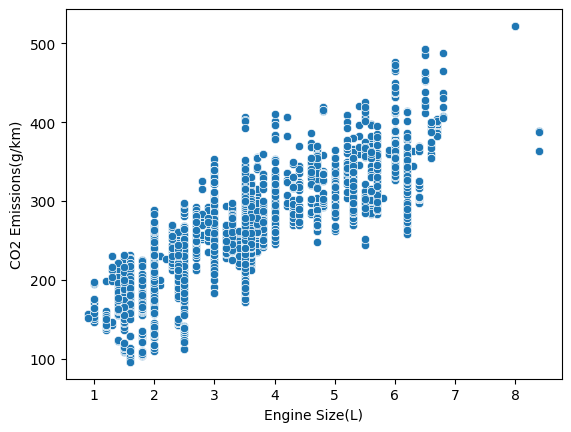

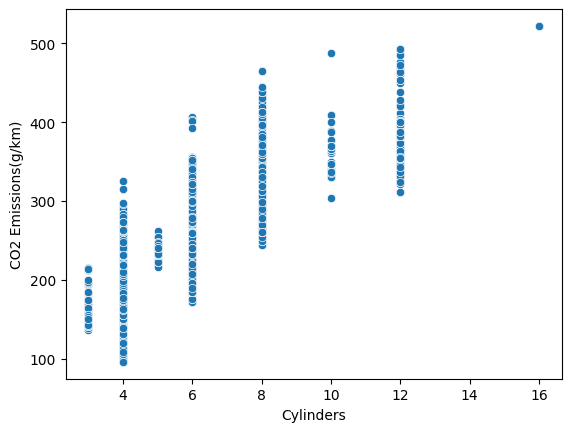

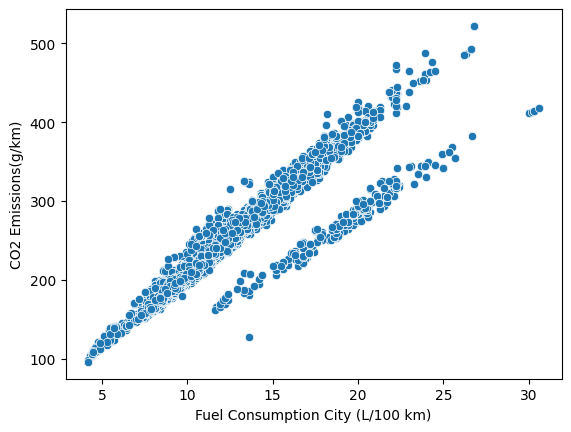

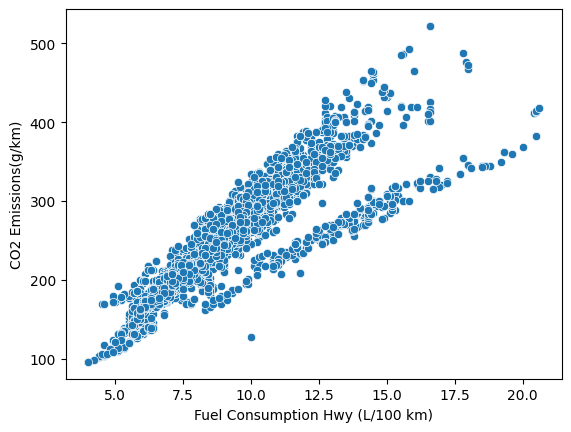

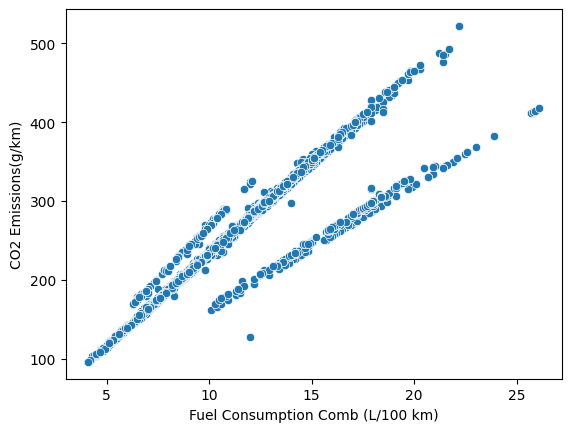

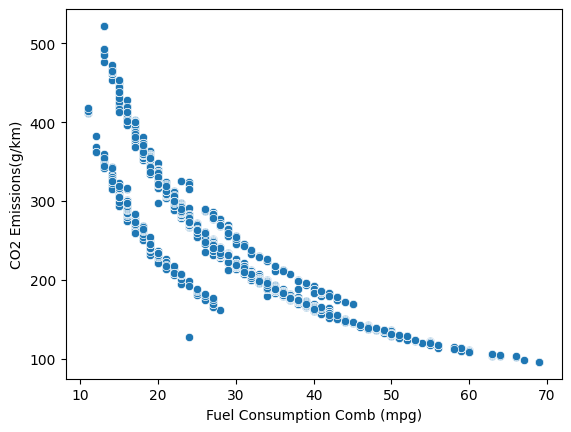

In [47]:
# SCATTER PLOTS
for i in df:
  if(df.dtypes[i] != object and i != 'CO2 Emissions(g/km)'):
    sns.scatterplot(data=df,x=i,y='CO2 Emissions(g/km)')
    plt.show()


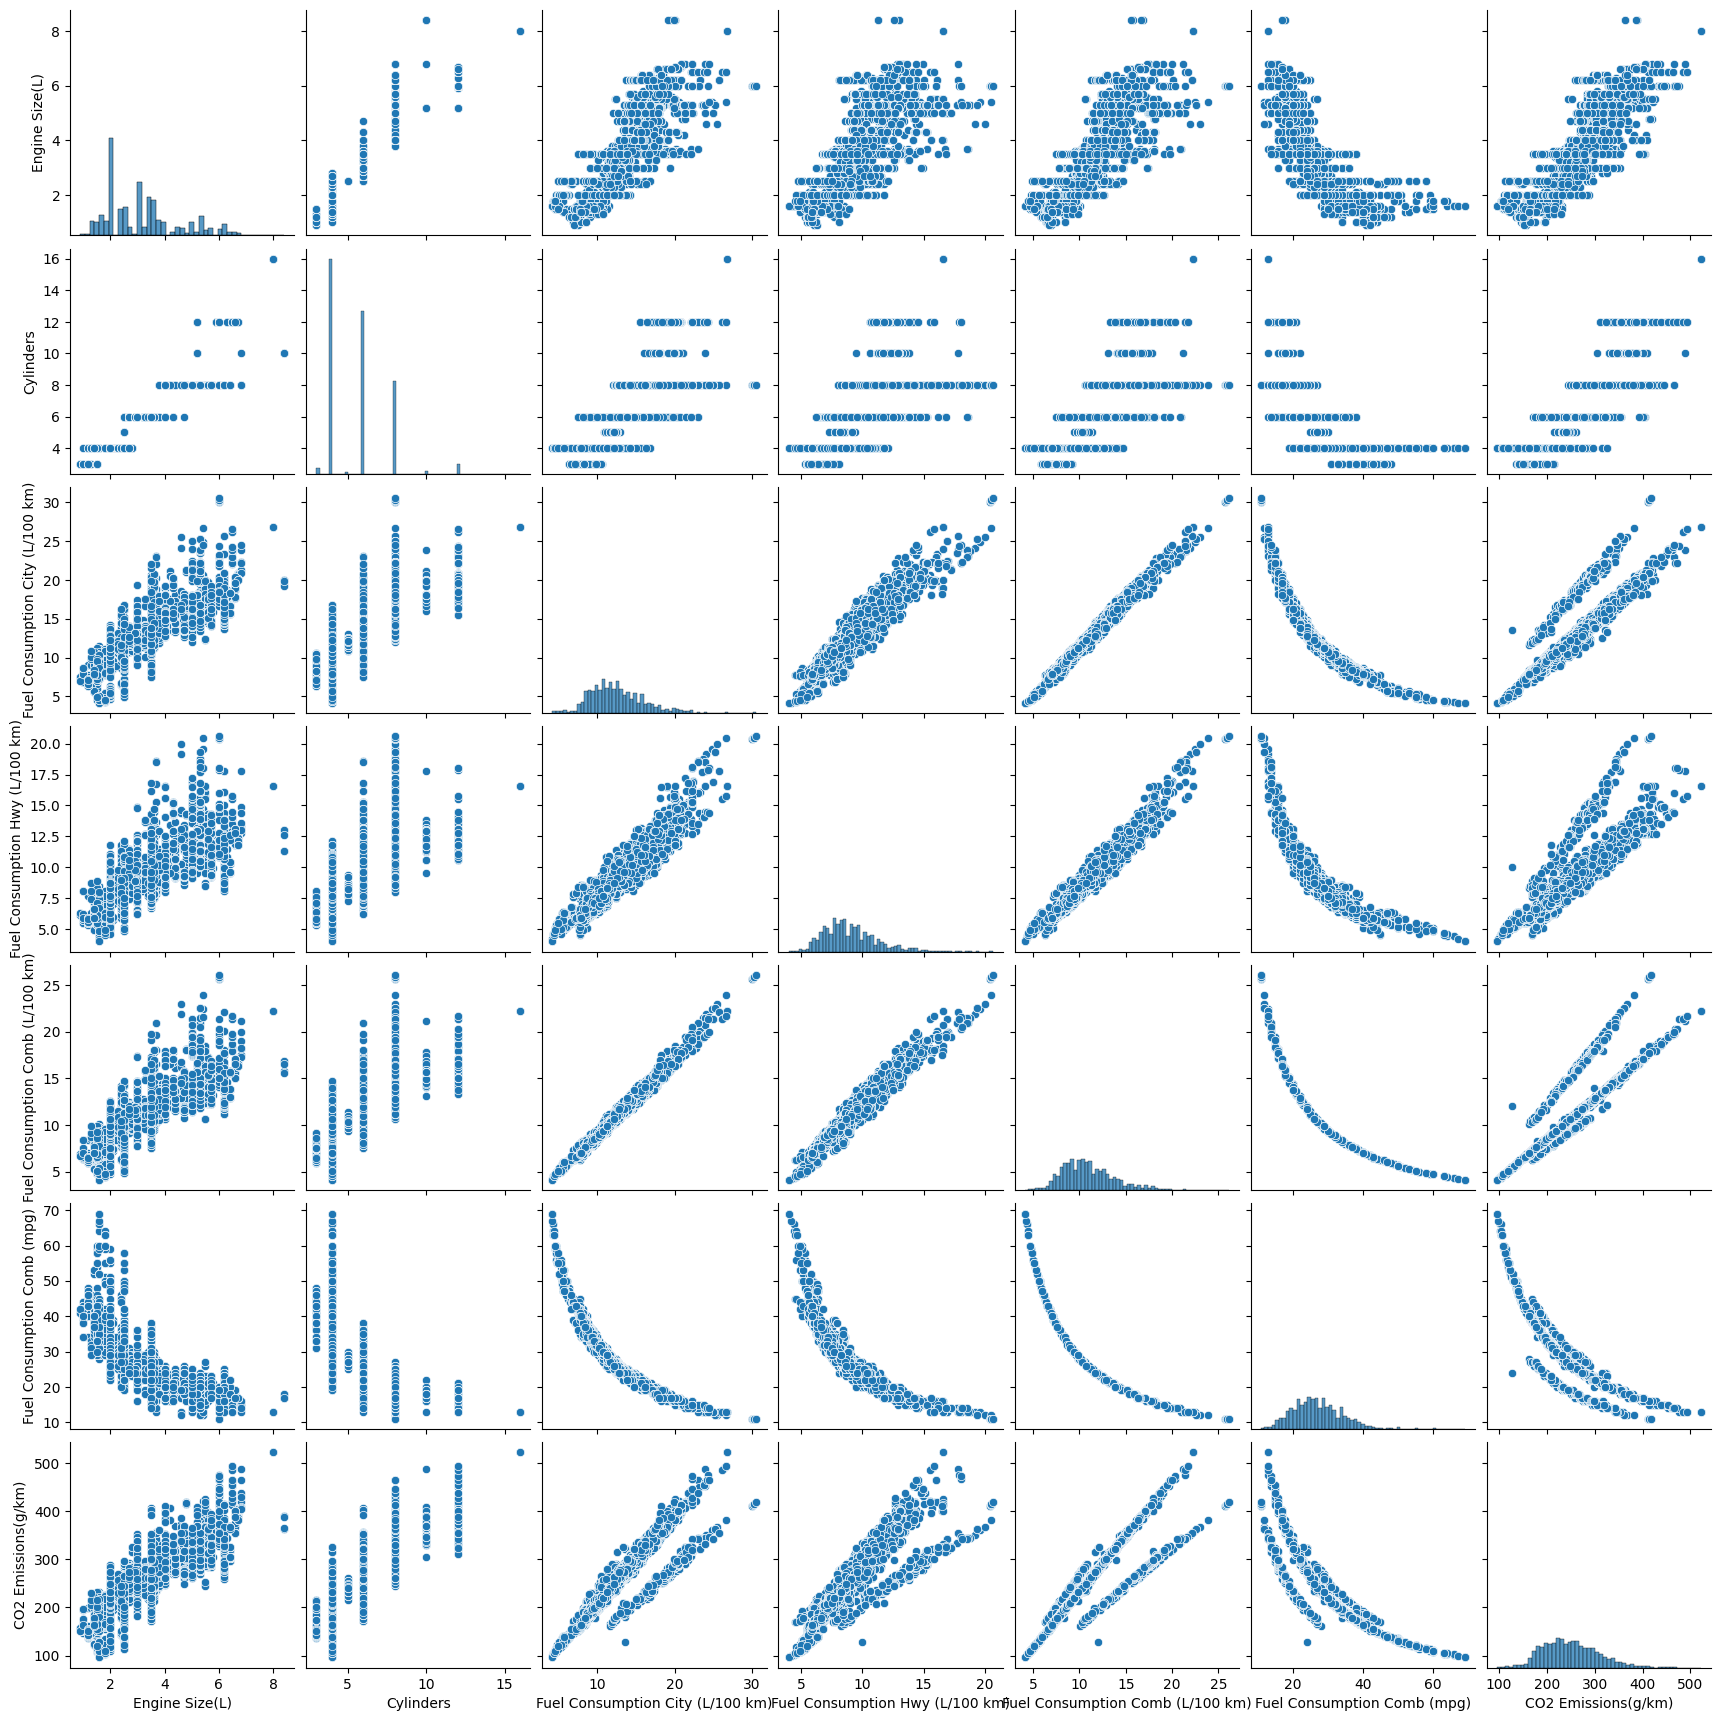

In [48]:
#PAIR PLOTS
sns.pairplot(df)

<ipython-input-49-268bf955fdf1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


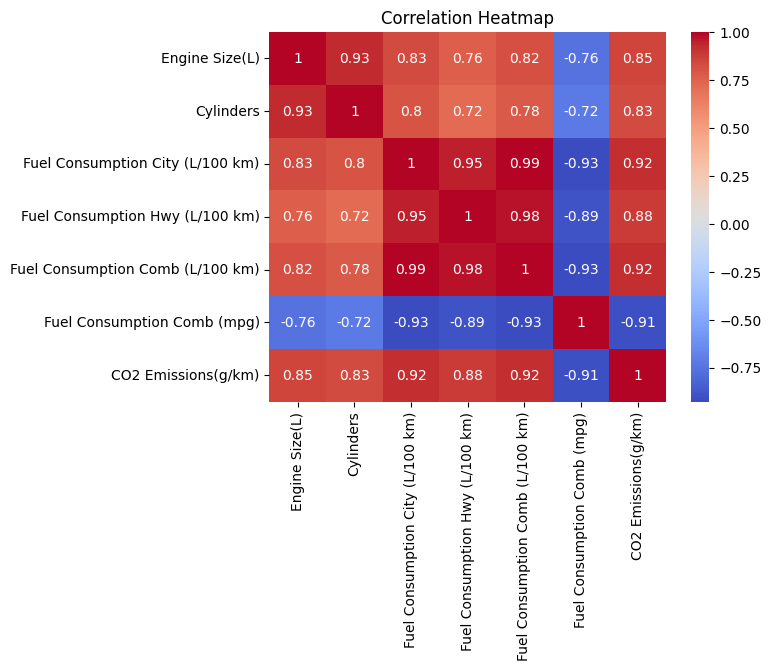

In [49]:
# HEAT MAP FPR NON CATEGORICAL DATA
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

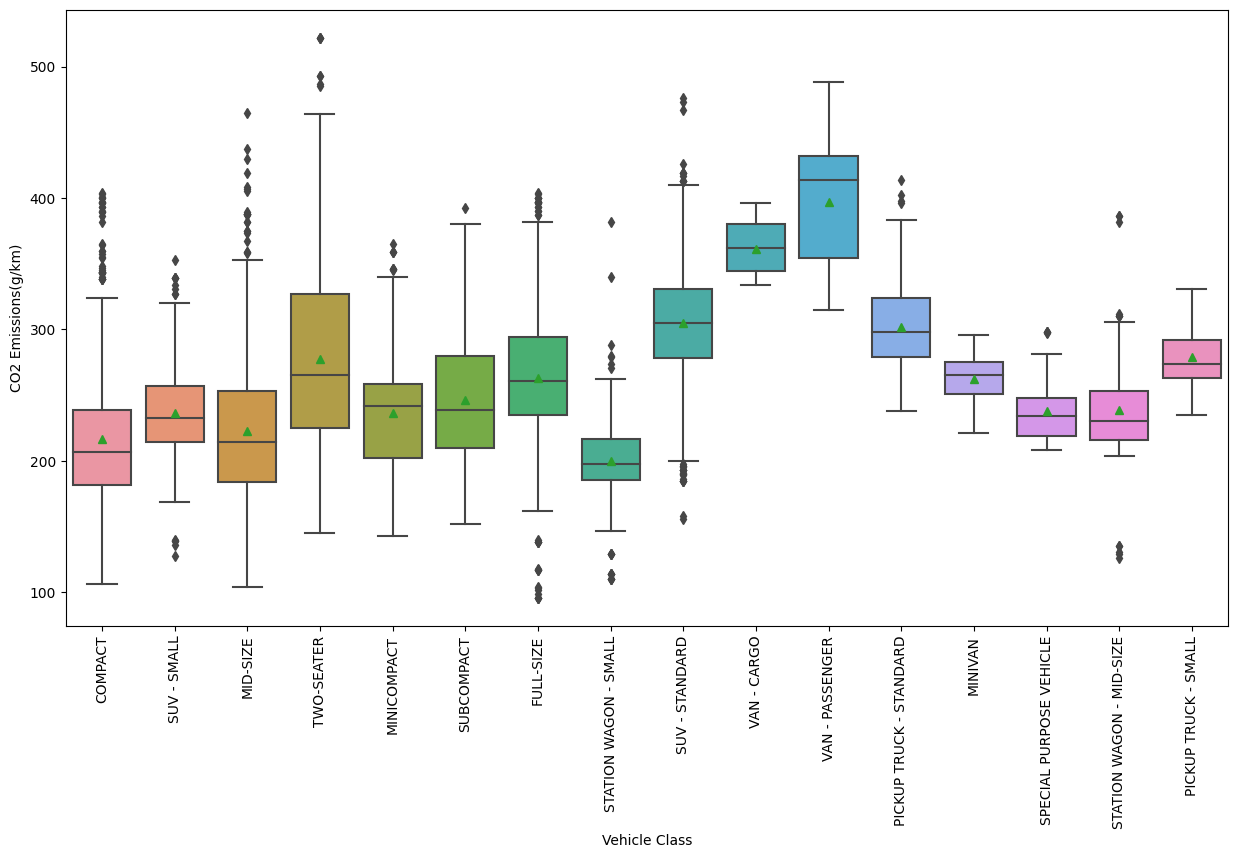

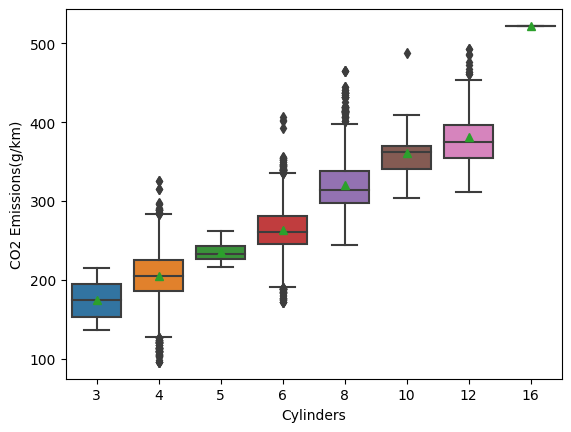

In [50]:
#BOX PLOTS
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df,showmeans=True);
plt.show()
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df,showmeans=True);
plt.show()

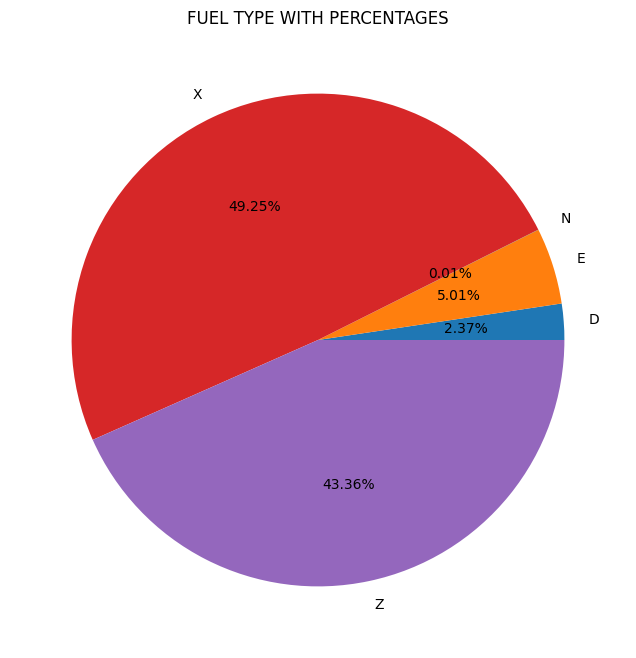

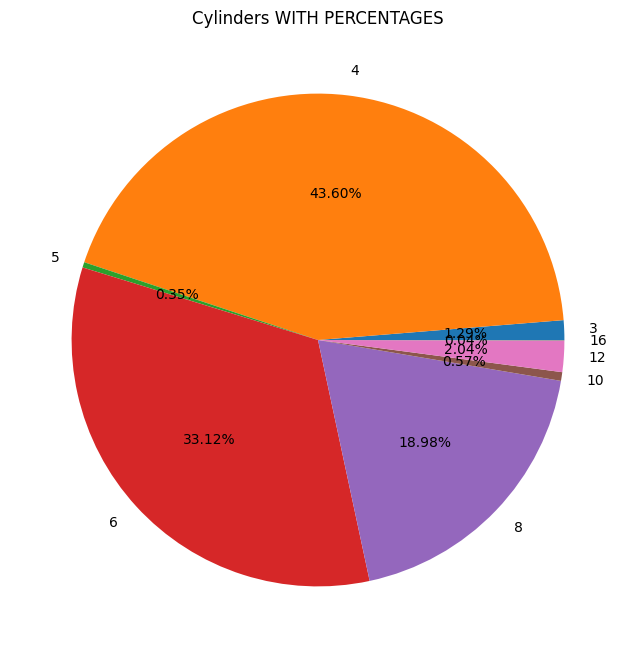

In [51]:
#Pie Chart for Categorical Data
plt.figure(figsize=(15,8))
plt.title("FUEL TYPE WITH PERCENTAGES")
df.groupby('Fuel Type').size().plot(kind='pie', autopct='%1.2f%%')
plt.show()
plt.figure(figsize=(15,8))
plt.title("Cylinders WITH PERCENTAGES")
df.groupby('Cylinders').size().plot(kind='pie', autopct='%1.2f%%')
plt.show()

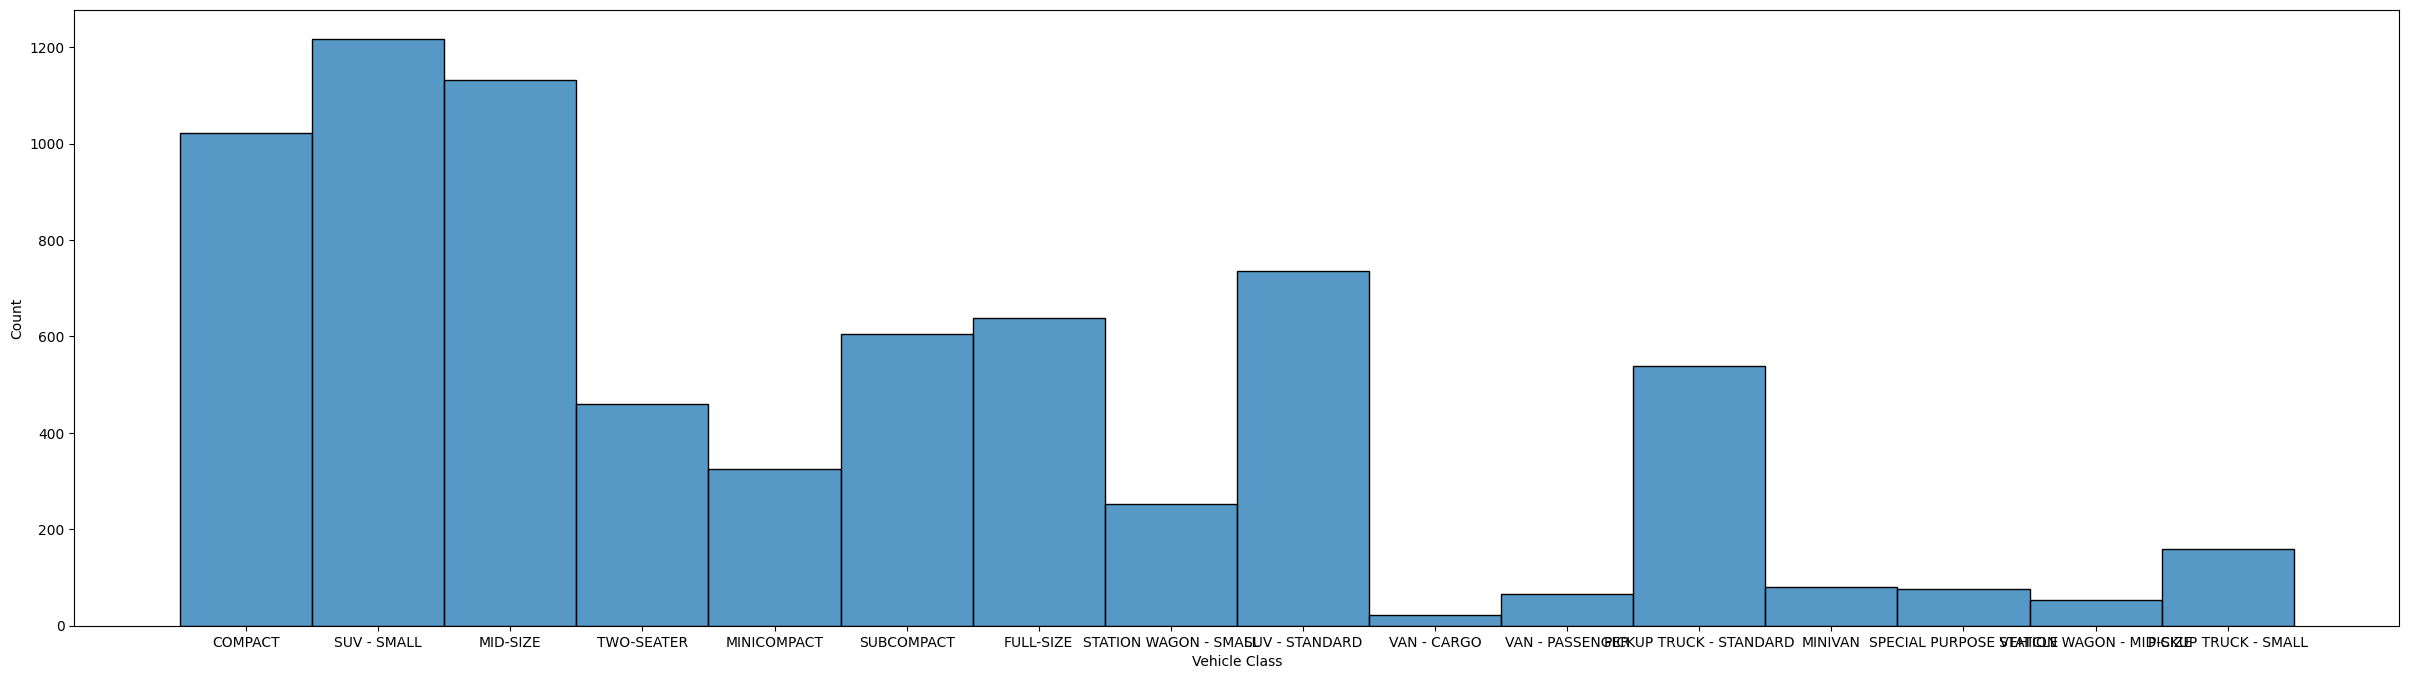

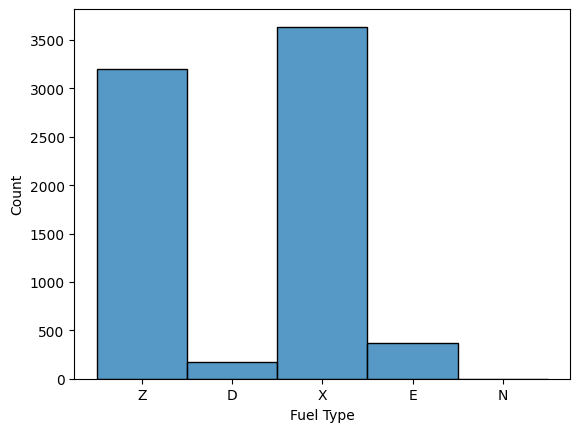

In [52]:
#Histograms
plt.figure(figsize=(30,8))
sns.histplot(data = df,x = "Vehicle Class",stat = 'count')
plt.show()
sns.histplot(data = df,x = "Fuel Type")
plt.show()

#Part B


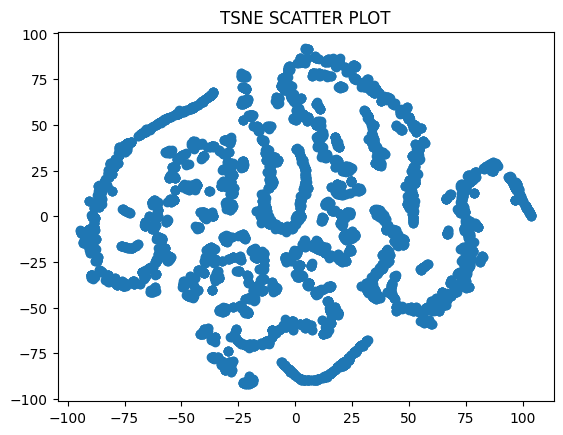

In [53]:
from sklearn.manifold import TSNE
df1 = df.drop(categorical_ls,axis = 1)
tsne = TSNE(n_components=2, perplexity=30, random_state=0, n_iter = 1000)
results_df = tsne.fit_transform(df1)
plt.scatter(x = results_df[:,0],y = results_df[:,1])
plt.title('TSNE SCATTER PLOT')
plt.show()

#Part C


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
df_c = df.copy()
labelencoder = LabelEncoder()
for i in categorical_ls:
  df_c[i] = labelencoder.fit_transform(df_c[i])
df_c

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
df_c.info()
df_c.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Model                             7385 non-null   int64  
 2   Vehicle Class                     7385 non-null   int64  
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   int64  
 6   Fuel Type                         7385 non-null   int64  
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [58]:
X_ls = []
X_ls.extend(categorical_ls)
X_ls.extend(numerical_ls)
Y_ls = target.copy()
print(X_ls)
print(Y_ls)
X = df_c[X_ls]
Y = df_c[Y_ls]
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']
['CO2 Emissions(g/km)']


In [59]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [60]:
y_train_predicted = lr1.predict(x_train)
y_test_predicted = lr1.predict(x_test)
lr1.score(x_test,y_test)

0.926510606943462

In [61]:
n = len(y_train)
p = x_train.shape[1]

mse_train = mean_squared_error(y_train, y_train_predicted)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_predicted)
adjusted_r2_train = 1 - (1 - r2_train) * ((n - 1) / (n - p - 1))
mae_train = mean_absolute_error(y_train, y_train_predicted)

mse_test = mean_squared_error(y_test, y_test_predicted)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_predicted)
adjusted_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))
mae_test = mean_absolute_error(y_test, y_test_predicted)

metrics_c = {
    'TRAINING DATA' : [mse_train,rmse_train,r2_train,adjusted_r2_train,mae_train],
    'TESTING DATA': [mse_test,rmse_test,r2_test,adjusted_r2_test,mae_test],
}
idx = ['MSE','RMSE','R2','Adjusted R2','MAE']
df_metrics_c = pd.DataFrame(metrics_c,index = idx)
print(df_metrics_c)

             TRAINING DATA  TESTING DATA
MSE             295.177056    258.138270
RMSE             17.180718     16.066682
R2                0.913177      0.926511
Adjusted R2       0.913015      0.926373
MAE              11.238194     10.470382


#Part D

In [62]:
from sklearn.decomposition import PCA

In [63]:
df_d = df_c.copy()
X = df_d[X_ls]
Y = df_d[Y_ls]
no_of_components = [2,4,6,8,10]
for n_ in no_of_components:
  print("PCA WITH NO OF COMPONENTS = " + str(n_))
  pca = PCA(n_components=n_)
  X_n = pca.fit_transform(X)
  cols = []
  for i in range(n_):
    cols.append('pca ' + str(i))
  df_n = pd.DataFrame(X_n,columns = cols)
  x_train, x_test,y_train,y_test = train_test_split(X_n,Y,test_size =0.2)
  lr1 = LinearRegression()
  lr1.fit(x_train,y_train)
  y_train_predicted = lr1.predict(x_train)
  y_test_predicted = lr1.predict(x_test)
  lr1.score(x_test,y_test)

  #Calculating Metrics
  n = len(y_train)  # Number of samples in the training data
  p = x_train.shape[1]  # Number of features

  mse_train = mean_squared_error(y_train, y_train_predicted)
  rmse_train = np.sqrt(mse_train)
  r2_train = r2_score(y_train, y_train_predicted)
  adjusted_r2_train = 1 - (1 - r2_train) * ((n - 1) / (n - p - 1))
  mae_train = mean_absolute_error(y_train, y_train_predicted)

  mse_test = mean_squared_error(y_test, y_test_predicted)
  rmse_test = np.sqrt(mse_test)
  r2_test = r2_score(y_test, y_test_predicted)
  adjusted_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))
  mae_test = mean_absolute_error(y_test, y_test_predicted)

  metrics_c = {
      'TRAINING DATA' : [mse_train,rmse_train,r2_train,adjusted_r2_train,mae_train],
      'TESTING DATA': [mse_test,rmse_test,r2_test,adjusted_r2_test,mae_test],
  }
  idx = ['MSE','RMSE','R2','Adjusted R2','MAE']
  df_metrics_c = pd.DataFrame(metrics_c,index = idx)
  print(df_metrics_c)
  print()

PCA WITH NO OF COMPONENTS = 2
             TRAINING DATA  TESTING DATA
MSE            2776.707846   2554.442701
RMSE             52.694476     50.541495
R2                0.200487      0.207222
Adjusted R2       0.200216      0.206954
MAE              41.293940     39.795481

PCA WITH NO OF COMPONENTS = 4
             TRAINING DATA  TESTING DATA
MSE             457.237671    436.144308
RMSE             21.383116     20.884068
R2                0.867724      0.867347
Adjusted R2       0.867634      0.867257
MAE              13.783732     13.475276

PCA WITH NO OF COMPONENTS = 6
             TRAINING DATA  TESTING DATA
MSE             369.059370    393.693058
RMSE             19.210918     19.841700
R2                0.891220      0.888947
Adjusted R2       0.891109      0.888834
MAE              11.030404     11.427482

PCA WITH NO OF COMPONENTS = 8
             TRAINING DATA  TESTING DATA
MSE             287.753851    302.565302
RMSE             16.963309     17.394404
R2              

#Part E

In [64]:
df_e = df.copy()
df_e = pd.get_dummies(df_e,columns = categorical_ls)
df_e1 = df_e.drop(target,axis = 1)
df_e1

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,2.0,4,11.2,8.3,9.9,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,2.0,4,11.2,8.3,9.9,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
y = df_e['CO2 Emissions(g/km)']
x_train, x_test,y_train,y_test = train_test_split(df_e1,y,test_size =0.2)
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

y_train_predicted = lr1.predict(x_train)
y_test_predicted = lr1.predict(x_test)
lr1.score(x_test,y_test)

#Calculating Metrics
n = len(y_train)
p = x_train.shape[1]

mse_train = mean_squared_error(y_train, y_train_predicted)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_predicted)
adjusted_r2_train = 1 - (1 - r2_train) * ((n - 1) / (n - p - 1))
mae_train = mean_absolute_error(y_train, y_train_predicted)

mse_test = mean_squared_error(y_test, y_test_predicted)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_predicted)
adjusted_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))
mae_test = mean_absolute_error(y_test, y_test_predicted)

metrics_e = {
    'TRAINING DATA' : [mse_train,rmse_train,r2_train,adjusted_r2_train,mae_train],
    'TESTING DATA': [mse_test,rmse_test,r2_test,adjusted_r2_test,mae_test],
}
idx = ['MSE','RMSE','R2','Adjusted R2','MAE']
df_metrics_e = pd.DataFrame(metrics_e,index = idx)
print(df_metrics_e)

             TRAINING DATA  TESTING DATA
MSE               8.570359  2.888609e+20
RMSE              2.927518  1.699591e+10
R2                0.997464 -8.030857e+16
Adjusted R2       0.996014 -1.262328e+17
MAE               1.893353  3.508334e+09


#Part F

In [66]:
df_f = df_e.copy()
df_f1 = df_e1.copy()
X = df_f1
Y = df_e['CO2 Emissions(g/km)']
no_of_components = [2,4,6,8,10]
for n_ in no_of_components:
  print("PCA WITH NO OF COMPONENTS = " + str(n_))
  pca = PCA(n_components=n_)
  X_n = pca.fit_transform(X)
  cols = []
  for i in range(n_):
    cols.append('pca ' + str(i))
  df_n = pd.DataFrame(X_n,columns = cols)
  x_train, x_test,y_train,y_test = train_test_split(X_n,Y,test_size =0.2)
  lr1 = LinearRegression()
  lr1.fit(x_train,y_train)
  y_train_predicted = lr1.predict(x_train)
  y_test_predicted = lr1.predict(x_test)
  lr1.score(x_test,y_test)


  n = len(y_train)
  p = x_train.shape[1]

  mse_train = mean_squared_error(y_train, y_train_predicted)
  rmse_train = np.sqrt(mse_train)
  r2_train = r2_score(y_train, y_train_predicted)
  adjusted_r2_train = 1 - (1 - r2_train) * ((n - 1) / (n - p - 1))
  mae_train = mean_absolute_error(y_train, y_train_predicted)

  mse_test = mean_squared_error(y_test, y_test_predicted)
  rmse_test = np.sqrt(mse_test)
  r2_test = r2_score(y_test, y_test_predicted)
  adjusted_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))
  mae_test = mean_absolute_error(y_test, y_test_predicted)

  metrics_f = {
      'TRAINING DATA' : [mse_train,rmse_train,r2_train,adjusted_r2_train,mae_train],
      'TESTING DATA': [mse_test,rmse_test,r2_test,adjusted_r2_test,mae_test],
  }
  idx = ['MSE','RMSE','R2','Adjusted R2','MAE']
  df_metrics_f = pd.DataFrame(metrics_f,index = idx)
  print(df_metrics_f)
  print()

PCA WITH NO OF COMPONENTS = 2
             TRAINING DATA  TESTING DATA
MSE             376.272097    383.239369
RMSE             19.397734     19.576500
R2                0.889951      0.888564
Adjusted R2       0.889914      0.888527
MAE              11.006305     11.030149

PCA WITH NO OF COMPONENTS = 4
             TRAINING DATA  TESTING DATA
MSE             336.824469    318.892616
RMSE             18.352778     17.857565
R2                0.902115      0.904769
Adjusted R2       0.902049      0.904704
MAE              11.591412     11.440505

PCA WITH NO OF COMPONENTS = 6
             TRAINING DATA  TESTING DATA
MSE             325.036415    320.624306
RMSE             18.028766     17.905985
R2                0.905821      0.903123
Adjusted R2       0.905726      0.903025
MAE              11.423221     11.482435

PCA WITH NO OF COMPONENTS = 8
             TRAINING DATA  TESTING DATA
MSE             323.992192    322.473531
RMSE             17.999783     17.957548
R2              

#Part G

In [67]:
from sklearn.linear_model import Ridge, Lasso

In [68]:
df_g = df_c.copy()
X = df_g[X_ls]
Y = df_g[Y_ls]
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)


In [69]:
#L1 - LASSO REGULARIZATION
l1 = Lasso(alpha = 1.0)
l1.fit(x_train, y_train)

y_test_predicted = l1.predict(x_test)
l1.score(x_test,y_test)


n = len(y_train)
p = x_train.shape[1]

mse_test = mean_squared_error(y_test, y_test_predicted)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_predicted)
adjusted_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))
mae_test = mean_absolute_error(y_test, y_test_predicted)

metrics_l1 = {
    'TESTING DATA': [mse_test,rmse_test,r2_test,adjusted_r2_test,mae_test],
}
idx = ['MSE','RMSE','R2','Adjusted R2','MAE']
df_metrics_l1 = pd.DataFrame(metrics_l1,index = idx)
print(df_metrics_l1)

             TESTING DATA
MSE            263.356256
RMSE            16.228255
R2               0.923112
Adjusted R2      0.922969
MAE             10.519545


In [70]:
#L2 - RIDGE REGULARIZATION
l2 = Ridge(alpha = 1.0)
l2.fit(x_train, y_train)

y_test_predicted = l2.predict(x_test)
l2.score(x_test,y_test)


n = len(y_train)
p = x_train.shape[1]

mse_test = mean_squared_error(y_test, y_test_predicted)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_predicted)
adjusted_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))
mae_test = mean_absolute_error(y_test, y_test_predicted)

metrics_l2 = {
    'TESTING DATA': [mse_test,rmse_test,r2_test,adjusted_r2_test,mae_test],
}
idx = ['MSE','RMSE','R2','Adjusted R2','MAE']
df_metrics_l2 = pd.DataFrame(metrics_l2,index = idx)
print(df_metrics_l2)

             TESTING DATA
MSE            266.076842
RMSE            16.311862
R2               0.922318
Adjusted R2      0.922173
MAE             10.640248


#Part H

In [71]:
from sklearn.linear_model import SGDRegressor

In [72]:
df_h = df_c.copy()
X = df_h[X_ls]
Y = df_h[Y_ls]
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
sgd = SGDRegressor(loss='squared_error', penalty='l2',alpha=0.001)
sgd.fit(x_train, y_train)


y_train_predicted = sgd.predict(x_train)
y_test_predicted = sgd.predict(x_test)
sgd.score(x_test,y_test)


n = len(y_train)
p = x_train.shape[1]

mse_train = mean_squared_error(y_train, y_train_predicted)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_predicted)
adjusted_r2_train = 1 - (1 - r2_train) * ((n - 1) / (n - p - 1))
mae_train = mean_absolute_error(y_train, y_train_predicted)

mse_test = mean_squared_error(y_test, y_test_predicted)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_predicted)
adjusted_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))
mae_test = mean_absolute_error(y_test, y_test_predicted)

metrics_g = {
    'TRAINING DATA' : [mse_train,rmse_train,r2_train,adjusted_r2_train,mae_train],
    'TESTING DATA': [mse_test,rmse_test,r2_test,adjusted_r2_test,mae_test],
}
idx = ['MSE','RMSE','R2','Adjusted R2','MAE']
df_metrics_g = pd.DataFrame(metrics_g,index = idx)
print(df_metrics_g)

             TRAINING DATA  TESTING DATA
MSE           4.209948e+28  4.184357e+28
RMSE          2.051816e+14  2.045570e+14
R2           -1.236362e+25 -1.198132e+25
Adjusted R2  -1.238669e+25 -1.200367e+25
MAE           1.782327e+14  1.764734e+14


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
